In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy

In [3]:
#Larry 09/05/2021
cnames = ['TIME','Lat', 'Lon', 'Head', 'Track', 'GnSpd', 'TAS', 'GeoAl', 'Press', 'WndDr', 'wndSpd','Tempr', 'Dewpt','D Val',  'RdAlt', 'MixR', 'VtWnd', 'SfcPr', 'ThetaE']
filename = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/larry/20210905H1.1sec.txt'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
df 

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,150517,27.848,82.063,174.3,171.5,129.5,127.0,1361.0,869.5,304.5,4.2,18.30,16.1,90.3,1363.0,13.57,0.2,1016.3,343.8
1,150518,27.847,82.063,174.5,171.6,129.6,127.0,1370.0,868.7,305.0,4.2,18.25,14.8,91.6,1372.0,13.53,0.3,1016.4,343.7
2,150519,27.845,82.063,174.7,171.7,129.7,127.1,1380.0,867.3,304.6,4.2,18.14,14.9,87.8,1381.0,13.46,0.5,1015.9,343.5
3,150520,27.843,82.063,174.8,171.8,129.8,127.2,1389.0,866.8,303.5,4.3,18.03,15.5,92.2,1390.0,13.40,0.4,1016.4,343.3
4,150521,27.843,82.063,175.1,172.0,129.9,127.2,1398.0,865.6,305.2,4.3,17.92,16.0,90.3,1399.0,13.36,0.3,1016.2,343.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,182956,17.733,65.113,117.1,118.2,121.4,128.0,856.0,919.6,95.3,7.1,22.65,16.9,47.3,858.0,15.97,-0.2,1013.5,350.5
12280,182957,17.733,65.112,116.9,118.2,121.4,127.8,854.0,919.8,93.5,7.0,22.68,17.1,45.5,855.0,15.98,-0.1,1013.3,350.5
12281,182958,17.733,65.110,116.8,118.1,121.4,128.0,851.0,920.0,95.6,7.0,22.71,17.1,44.9,852.0,15.98,0.0,1013.2,350.5
12282,182959,17.732,65.110,116.8,118.1,121.4,127.8,848.0,920.6,96.6,6.8,22.75,17.1,47.5,850.0,15.98,-0.2,1013.5,350.5


In [4]:
df.mask((df <= -900), inplace=True)
df

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,150517,27.848,82.063,174.3,171.5,129.5,127.0,1361.0,869.5,304.5,4.2,18.30,16.1,90.3,1363.0,13.57,0.2,1016.3,343.8
1,150518,27.847,82.063,174.5,171.6,129.6,127.0,1370.0,868.7,305.0,4.2,18.25,14.8,91.6,1372.0,13.53,0.3,1016.4,343.7
2,150519,27.845,82.063,174.7,171.7,129.7,127.1,1380.0,867.3,304.6,4.2,18.14,14.9,87.8,1381.0,13.46,0.5,1015.9,343.5
3,150520,27.843,82.063,174.8,171.8,129.8,127.2,1389.0,866.8,303.5,4.3,18.03,15.5,92.2,1390.0,13.40,0.4,1016.4,343.3
4,150521,27.843,82.063,175.1,172.0,129.9,127.2,1398.0,865.6,305.2,4.3,17.92,16.0,90.3,1399.0,13.36,0.3,1016.2,343.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12279,182956,17.733,65.113,117.1,118.2,121.4,128.0,856.0,919.6,95.3,7.1,22.65,16.9,47.3,858.0,15.97,-0.2,1013.5,350.5
12280,182957,17.733,65.112,116.9,118.2,121.4,127.8,854.0,919.8,93.5,7.0,22.68,17.1,45.5,855.0,15.98,-0.1,1013.3,350.5
12281,182958,17.733,65.110,116.8,118.1,121.4,128.0,851.0,920.0,95.6,7.0,22.71,17.1,44.9,852.0,15.98,0.0,1013.2,350.5
12282,182959,17.732,65.110,116.8,118.1,121.4,127.8,848.0,920.6,96.6,6.8,22.75,17.1,47.5,850.0,15.98,-0.2,1013.5,350.5


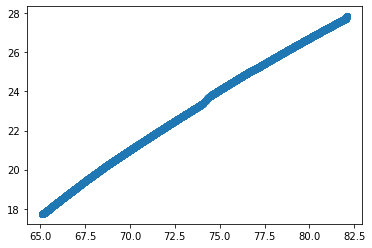

In [5]:
plt.scatter(df.Lon, df.Lat)

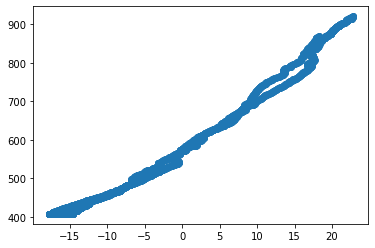

In [6]:
plt.scatter(df.Tempr, df.Press)

In [7]:
#Hurricane Ida 08/27/2021
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy
cnames = ['TIME' ,      'Lat'   ,    'Lon'   ,  'Head'  , 'Track'    ,  'GnSpd'   ,  'TAS'   , 'GeoAl'  ,  'Press'   ,  'WndDr'  ,   'WndSp'  , 'Tempr'  ,  'Dewpt'  , 'D Val'   ,  'RdAlt'   , 'MixR'   , 'VtWnd'    , 'SfcPr' ,   'ThetaE']
filename = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/ida/20210829H1.1sec.txt'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
#df.clip
df 


,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,WndSp,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,170017,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.2,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
1,170018,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.2,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
2,170019,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.1,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
3,170020,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.1,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
4,170021,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.1,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22180,230957,28.223,82.558,128.0,129.1,113.1,117.2,2274.0,783.3,121.0,4.1,14.95,12.7,156.4,2277.0,11.10,0.4,1017.2,342.9
22181,230958,28.223,82.558,127.9,129.0,113.1,117.2,2274.0,783.3,123.6,4.1,14.93,12.6,156.3,2277.0,11.13,0.6,1017.2,343.0
22182,230959,28.222,82.557,128.0,128.9,113.1,117.4,2274.0,783.3,120.9,4.3,14.87,12.5,156.2,2276.0,11.15,0.8,1017.3,343.0
22183,231000,28.222,82.557,127.9,128.8,113.2,117.5,2273.0,783.3,121.6,4.3,14.97,12.4,155.9,2276.0,11.18,0.9,1017.2,343.2


In [8]:
# replace -0.1 values with NaN mask 

df.mask((df <= 1), inplace=True)
df

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,WndSp,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,170017.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,NaN,NaN,NaN,NaN,NaN,NaN
1,170018.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,NaN,NaN,NaN,NaN,NaN,NaN
2,170019.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.1,NaN,NaN,NaN,NaN,NaN,NaN
3,170020.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.1,NaN,NaN,NaN,NaN,NaN,NaN
4,170021.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22180,230957.0,28.223,82.558,128.0,129.1,113.1,117.2,2274.0,783.3,121.0,4.1,14.95,12.7,156.4,2277.0,11.10,NaN,1017.2,342.9
22181,230958.0,28.223,82.558,127.9,129.0,113.1,117.2,2274.0,783.3,123.6,4.1,14.93,12.6,156.3,2277.0,11.13,NaN,1017.2,343.0
22182,230959.0,28.222,82.557,128.0,128.9,113.1,117.4,2274.0,783.3,120.9,4.3,14.87,12.5,156.2,2276.0,11.15,NaN,1017.3,343.0
22183,231000.0,28.222,82.557,127.9,128.8,113.2,117.5,2273.0,783.3,121.6,4.3,14.97,12.4,155.9,2276.0,11.18,NaN,1017.2,343.2


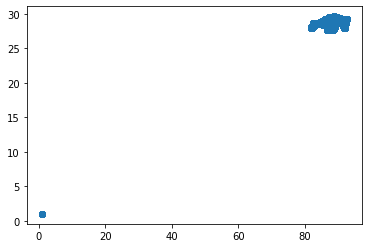

In [9]:
plt.scatter(df.Lon, df.Lat)

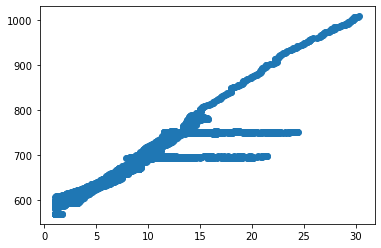

In [10]:
plt.scatter(df.Tempr, df.Press)

In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy

In [12]:
# SAM 09/25/2021
cnames = ['TIME','Lat', 'Lon', 'Head', 'Track', 'GnSpd', 'TAS', 'GeoAl', 'Press', 'WndDr', 'wndSpd','Tempr', 'Dewpt','D Val',  'RdAlt', 'MixR', 'VtWnd', 'SfcPr', 'ThetaE']
filename = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/sam/20210925N1.1sec.txt'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
df 

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,182417,17.703,64.782,91.6,90.1,98.8,104.0,285.0,984.1,126.7,5.8,27.19,24.3,40.4,286.0,17.03,0.0,1016.2,352.2
1,182418,17.703,64.782,92.0,90.7,99.2,104.3,294.0,982.5,128.6,5.8,27.03,24.4,36.1,295.0,16.95,-0.7,1015.6,351.9
2,182419,17.703,64.780,92.1,91.1,99.2,104.2,305.0,981.3,121.0,4.9,26.98,24.4,36.4,305.0,16.93,-1.1,1015.5,351.9
3,182420,17.703,64.778,91.7,91.4,99.3,104.2,316.0,980.2,130.5,5.3,26.87,24.5,38.3,317.0,16.85,-0.5,1015.7,351.6
4,182421,17.703,64.778,91.5,91.6,99.5,104.1,328.0,979.2,131.0,5.1,26.77,24.5,41.6,329.0,16.96,-0.4,1016.0,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26738,254956,17.698,64.818,81.1,83.7,68.4,72.2,56.0,1009.7,55.7,4.0,28.90,24.6,26.9,56.0,16.71,0.8,1016.1,350.6
26739,254957,17.698,64.817,81.3,83.9,68.2,71.7,52.0,1010.2,52.7,3.9,28.83,24.6,27.1,52.0,16.72,0.8,1016.1,350.5
26740,254958,17.698,64.817,81.1,83.8,68.4,70.8,48.0,1010.8,48.6,2.8,28.79,24.6,28.9,48.0,16.75,0.8,1016.4,350.5
26741,254959,17.700,64.817,81.1,83.8,68.4,70.3,44.0,1011.3,32.2,2.7,28.72,24.6,28.7,44.0,16.80,1.3,1016.4,350.5


In [13]:
df.mask((df <= -900), inplace=True)
df

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,wndSpd,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,182417,17.703,64.782,91.6,90.1,98.8,104.0,285.0,984.1,126.7,5.8,27.19,24.3,40.4,286.0,17.03,0.0,1016.2,352.2
1,182418,17.703,64.782,92.0,90.7,99.2,104.3,294.0,982.5,128.6,5.8,27.03,24.4,36.1,295.0,16.95,-0.7,1015.6,351.9
2,182419,17.703,64.780,92.1,91.1,99.2,104.2,305.0,981.3,121.0,4.9,26.98,24.4,36.4,305.0,16.93,-1.1,1015.5,351.9
3,182420,17.703,64.778,91.7,91.4,99.3,104.2,316.0,980.2,130.5,5.3,26.87,24.5,38.3,317.0,16.85,-0.5,1015.7,351.6
4,182421,17.703,64.778,91.5,91.6,99.5,104.1,328.0,979.2,131.0,5.1,26.77,24.5,41.6,329.0,16.96,-0.4,1016.0,352.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26738,254956,17.698,64.818,81.1,83.7,68.4,72.2,56.0,1009.7,55.7,4.0,28.90,24.6,26.9,56.0,16.71,0.8,1016.1,350.6
26739,254957,17.698,64.817,81.3,83.9,68.2,71.7,52.0,1010.2,52.7,3.9,28.83,24.6,27.1,52.0,16.72,0.8,1016.1,350.5
26740,254958,17.698,64.817,81.1,83.8,68.4,70.8,48.0,1010.8,48.6,2.8,28.79,24.6,28.9,48.0,16.75,0.8,1016.4,350.5
26741,254959,17.700,64.817,81.1,83.8,68.4,70.3,44.0,1011.3,32.2,2.7,28.72,24.6,28.7,44.0,16.80,1.3,1016.4,350.5


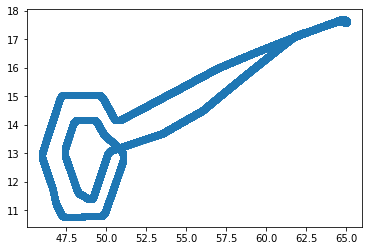

In [14]:
plt.scatter(df.Lon, df.Lat)

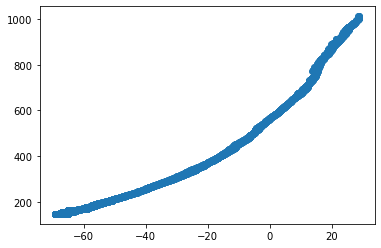

In [15]:
plt.scatter(df.Tempr, df.Press)

In [16]:
#Hurricane Ida 08/27/2021
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy
cnames = ['TIME' ,      'Lat'   ,    'Lon'   ,  'Head'  , 'Track'    ,  'GnSpd'   ,  'TAS'   , 'GeoAl'  ,  'Press'   ,  'WndDr'  ,   'WndSp'  , 'Tempr'  ,  'Dewpt'  , 'D Val'   ,  'RdAlt'   , 'MixR'   , 'VtWnd'    , 'SfcPr' ,   'ThetaE']
filename = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/ida/20210829H1.1sec.txt'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
#df.clip
df 

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,WndSp,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,170017,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.2,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
1,170018,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.2,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
2,170019,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.1,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
3,170020,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.1,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
4,170021,1.002,1.002,-0.1,-0.1,-0.1,-0.1,-1.0,-0.1,-0.1,-0.1,-0.01,25.1,-0.1,-1.0,-0.01,-0.1,-0.1,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22180,230957,28.223,82.558,128.0,129.1,113.1,117.2,2274.0,783.3,121.0,4.1,14.95,12.7,156.4,2277.0,11.10,0.4,1017.2,342.9
22181,230958,28.223,82.558,127.9,129.0,113.1,117.2,2274.0,783.3,123.6,4.1,14.93,12.6,156.3,2277.0,11.13,0.6,1017.2,343.0
22182,230959,28.222,82.557,128.0,128.9,113.1,117.4,2274.0,783.3,120.9,4.3,14.87,12.5,156.2,2276.0,11.15,0.8,1017.3,343.0
22183,231000,28.222,82.557,127.9,128.8,113.2,117.5,2273.0,783.3,121.6,4.3,14.97,12.4,155.9,2276.0,11.18,0.9,1017.2,343.2


In [17]:
# replace -0.1 values with NaN mask 

df.mask((df <= 1), inplace=True)
df

,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,WndSp,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,170017.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,NaN,NaN,NaN,NaN,NaN,NaN
1,170018.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.2,NaN,NaN,NaN,NaN,NaN,NaN
2,170019.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.1,NaN,NaN,NaN,NaN,NaN,NaN
3,170020.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.1,NaN,NaN,NaN,NaN,NaN,NaN
4,170021.0,1.002,1.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22180,230957.0,28.223,82.558,128.0,129.1,113.1,117.2,2274.0,783.3,121.0,4.1,14.95,12.7,156.4,2277.0,11.10,NaN,1017.2,342.9
22181,230958.0,28.223,82.558,127.9,129.0,113.1,117.2,2274.0,783.3,123.6,4.1,14.93,12.6,156.3,2277.0,11.13,NaN,1017.2,343.0
22182,230959.0,28.222,82.557,128.0,128.9,113.1,117.4,2274.0,783.3,120.9,4.3,14.87,12.5,156.2,2276.0,11.15,NaN,1017.3,343.0
22183,231000.0,28.222,82.557,127.9,128.8,113.2,117.5,2273.0,783.3,121.6,4.3,14.97,12.4,155.9,2276.0,11.18,NaN,1017.2,343.2


In [18]:
#Hurricane Larry 09/04/2021
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import metpy
cnames = ['TIME' ,      'Lat'   ,    'Lon'   ,  'Head'  , 'Track'    ,  'GnSpd'   ,  'TAS'   , 'GeoAl'  ,  'Press'   ,  'WndDr'  ,   'WndSp'  , 'Tempr'  ,  'Dewpt'  , 'D Val'   ,  'RdAlt'   , 'MixR'   , 'VtWnd'    , 'SfcPr' ,   'ThetaE']
filename = 'https://www.aoml.noaa.gov/ftp/hrd/data/flightlevel/2021/larry/20210904N1.1sec.txt'
df = pd.read_csv(filename, skiprows=21, delim_whitespace=True, names=cnames)
#df.clip
df 





,TIME,Lat,Lon,Head,Track,GnSpd,TAS,GeoAl,Press,WndDr,WndSp,Tempr,Dewpt,D Val,RdAlt,MixR,VtWnd,SfcPr,ThetaE
0,130517,27.967,82.060,182.2,186.5,107.5,106.9,627.0,947.8,291.4,2.2,22.72,5.6,68.4,628.0,6.76,-1.9,1018.2,320.8
1,130518,27.965,82.060,181.0,185.2,107.8,107.4,629.0,947.3,289.5,1.8,22.69,5.5,66.2,629.0,6.79,-1.6,1018.0,320.9
2,130519,27.965,82.060,181.6,184.4,108.0,107.8,631.0,947.1,279.4,4.1,22.66,5.4,65.6,631.0,6.81,-1.5,1017.9,321.0
3,130520,27.963,82.062,182.2,184.3,108.0,108.0,632.0,947.0,276.6,5.1,22.69,5.3,66.1,633.0,6.86,-1.9,1017.9,321.1
4,130521,27.963,82.062,182.2,184.3,108.0,108.3,633.0,946.7,272.7,5.3,22.70,5.3,65.2,634.0,6.92,-1.5,1017.8,321.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,155356,17.700,64.793,84.9,76.2,4.2,9.9,12.0,1013.8,98.2,5.4,32.24,0.7,17.2,12.0,18.35,-2.6,1015.2,359.2
10120,155357,17.700,64.793,85.1,75.7,4.0,11.0,12.0,1013.8,96.9,7.0,32.03,0.6,17.0,12.0,18.37,-1.7,1015.2,359.0
10121,155358,17.700,64.793,84.8,73.6,3.8,12.0,12.0,1013.8,96.3,8.2,31.90,0.6,17.0,12.0,18.41,-1.6,1015.2,359.0
10122,155359,17.700,64.793,84.2,72.7,3.7,12.5,12.0,1013.8,95.1,9.0,31.68,0.6,17.0,12.0,18.42,-1.3,1015.2,358.7


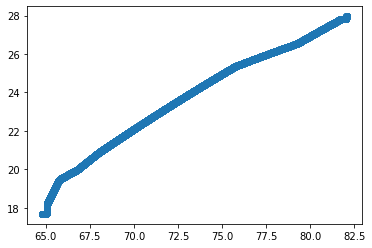

In [19]:
plt.scatter(df.Lon, df.Lat)

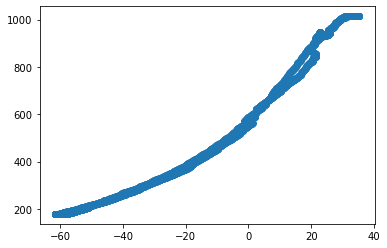

In [20]:
plt.scatter(df.Tempr, df.Press)